In [ ]:
import os
import re
import json
import pandas as pd

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# %cd /content/drive/MyDrive/AI Planning Project

/content/drive/.shortcut-targets-by-id/1aEeWcUXmV0Ymu3Re02AG9Sk2OKr-zwkW/AI Planning Project


In [ ]:
folders = os.getcwd()

In [ ]:
plan_length_list = []
is_plan_found_list = []
nodes_expanded_list = []
time_taken_list = []
blocks_list = []
problem_id_list = []
algorithm_list = []
heuristic_list = []

for folder in os.listdir(folders):
    if folder.find('blocks') >= 0 or folder.find('problem') >=0:        
        for file in os.listdir(os.path.join(folders, folder)):
            if file.find('.soln') >=0 and not(file.find('old') >=0) :
                filename = os.path.join(folders, folder, file)
                blocks = folder.split('blocks')[1]

                with open(filename, 'r+') as f:
                    text = f.read()
                    #print(text)
                dic = json.loads(re.search(r'.*> (.*).*', text).group(1))
                plan_length_list.append(dic['solution']['plan_length'])
                is_plan_found_list.append(dic['solution']['is_plan_found'])
                if dic['solution']['is_plan_found']:
                    nodes_expanded_list.append(dic['solution']['nodes_expanded'])
                    heuristic_list.append(dic['algorithm']['heuristic'])
                else:
                    nodes_expanded_list.append(0)
                    heuristic_list.append(heuristic_list[-1])
                time_taken_list.append(dic['solution']['time_taken'])
                blocks_list.append(dic['problem']['blocks'])
                problem_id_list.append(dic['problem']['name'])
                algorithm_list.append(dic['algorithm']['name'])
                

In [ ]:
results = pd.DataFrame({'problem_id':problem_id_list, 'algorithm':algorithm_list, 'heuristic':heuristic_list, 'no_of_blocks':blocks_list, \
                       'plan_found': is_plan_found_list, 'plan_length': plan_length_list, 'nodes_expanded': nodes_expanded_list, 'time_taken':time_taken_list
                       })

In [ ]:
results = pd.read_csv('ghn_results.csv')

In [ ]:
results.head()

,problem_id,algorithm,heuristic,no_of_blocks,plan_found,plan_length,nodes_expanded,time_taken
0,bw-10-7268-1,astar,"{'name': 'nn_plact', 'nn': {'name': 'gms', 'ar...",10,True,24,24,1.59
1,bw-10-7268-2,astar,"{'name': 'nn_plact', 'nn': {'name': 'gms', 'ar...",10,True,40,2606,34.06
2,bw-10-7268-3,astar,"{'name': 'nn_plact', 'nn': {'name': 'gms', 'ar...",10,True,28,137,3.31
3,bw-10-7268-4,astar,"{'name': 'nn_plact', 'nn': {'name': 'gms', 'ar...",10,True,26,26,1.70
4,bw-10-7268-5,astar,"{'name': 'nn_plact', 'nn': {'name': 'gms', 'ar...",10,True,24,35,1.76


In [ ]:
results[results['plan_found'] == False]

,problem_id,algorithm,heuristic,no_of_blocks,plan_found,plan_length,nodes_expanded,time_taken
252,bw-14-9843-43,astar,"{'name': 'nn_plact', 'nn': {'name': 'gms', 'ar...",14,False,0,0,300.00
272,bw-15-4678-13,astar,"{'name': 'nn_plact', 'nn': {'name': 'gms', 'ar...",15,False,0,0,300.01
290,bw-15-4678-31,astar,"{'name': 'nn_plact', 'nn': {'name': 'gms', 'ar...",15,False,0,0,300.00
492,bw-50-6176-3,astar,"{'name': 'nn_plact', 'nn': {'name': 'gms', 'ar...",50,False,0,0,300.06
495,bw-50-6176-6,astar,"{'name': 'nn_plact', 'nn': {'name': 'gms', 'ar...",50,False,0,0,300.30
500,bw-50-6176-11,astar,"{'name': 'nn_plact', 'nn': {'name': 'gms', 'ar...",50,False,0,0,300.04
501,bw-50-6176-12,astar,"{'name': 'nn_plact', 'nn': {'name': 'gms', 'ar...",50,False,0,0,300.04
502,bw-50-6176-13,astar,"{'name': 'nn_plact', 'nn': {'name': 'gms', 'ar...",50,False,0,0,300.00
503,bw-50-6176-14,astar,"{'name': 'nn_plact', 'nn': {'name': 'gms', 'ar...",50,False,0,0,300.69
507,bw-50-6176-18,astar,"{'name': 'nn_plact', 'nn': {'name': 'gms', 'ar...",50,False,0,0,300.05


In [ ]:
print(len(results[results['plan_found'] == False]))
print(len(results[results['plan_found'] == True]))

24
756


In [ ]:
len(results[results['plan_found'] == True])

756

In [ ]:
len(results[results['plan_found'] == False])

24

In [ ]:
# results.to_csv('results.csv', index = False)

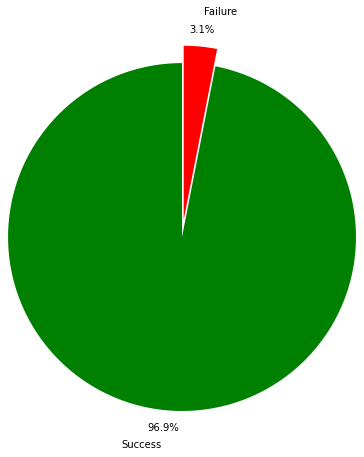

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


success = len(results[results['plan_found'] == True])
failure = len(results[results['plan_found'] == False])
y = np.array([success, failure])
#plt.figure(figsize=(8,5))
plt.pie(y, radius = 2, labels = ["Success", "Failure"], startangle = 90, explode = [0, 0.2], colors = ['green', 'red'], autopct='%1.1f%%', pctdistance=1.1, labeldistance=1.2)
plt.savefig("graphs/success.png")
plt.show()

In [ ]:
results = results.astype({'time_taken': 'float'})

In [ ]:
results.no_of_blocks = results.no_of_blocks.apply(str)

In [ ]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   problem_id      780 non-null    object 
 1   algorithm       780 non-null    object 
 2   heuristic       780 non-null    object 
 3   no_of_blocks    780 non-null    object 
 4   plan_found      780 non-null    bool   
 5   plan_length     780 non-null    int64  
 6   nodes_expanded  780 non-null    int64  
 7   time_taken      780 non-null    float64
dtypes: bool(1), float64(1), int64(2), object(4)
memory usage: 43.5+ KB


In [ ]:
statistics = results[results['plan_found'] == True].groupby('no_of_blocks').mean()
statistics.to_csv('ghn_statistics.csv')

In [ ]:
statistics = pd.read_csv('ghn_statistics.csv')

In [ ]:
statistics.no_of_blocks = statistics.no_of_blocks.apply(str)

In [ ]:
statistics.head()

,no_of_blocks,plan_found,plan_length,nodes_expanded,time_taken
0,10,1.0,24.766667,73.816667,2.277000
1,11,1.0,28.120000,63.440000,2.285200
2,12,1.0,31.600000,65.300000,2.490400
3,13,1.0,33.480000,202.100000,4.547200
4,14,1.0,37.428571,107.938776,3.466939


In [ ]:
def plot_chart(xAxis, yAxis, xname, yname):
    plt.plot(xAxis,yAxis)
   # plt.title('title name')
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.savefig(f"graphs/{yname}.png")
    plt.show()

In [ ]:
def plot(xAxis, yAxis, xname, yname):
    
  #plt.savefig(f"{testcase}_{col}.png")
  
    plt.bar(xAxis.apply(str), height = yAxis, width = 0.8)
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.savefig(f"graphs/{yname}.png")
    plt.show()

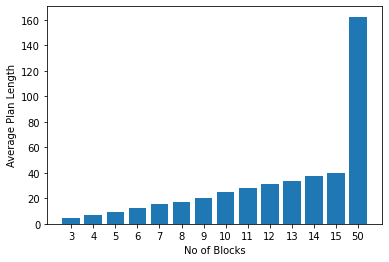

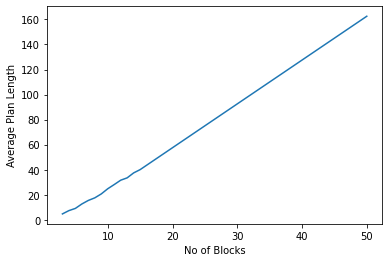

In [ ]:
xAxis = statistics['no_of_blocks']
yAxis = np.array(statistics['plan_length'])

plot(xAxis, yAxis, 'No of Blocks', 'Average Plan Length')
plot_chart(xAxis, np.array(yAxis), 'No of Blocks', 'Average Plan Length')

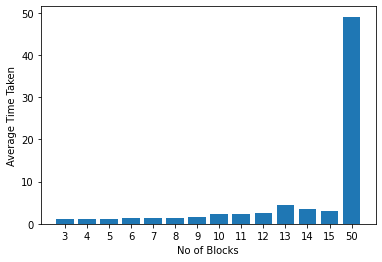

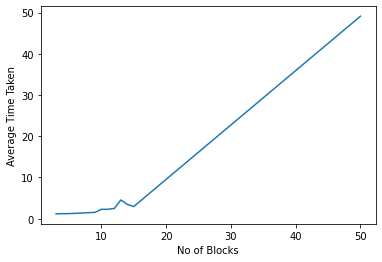

In [ ]:
xAxis = statistics['no_of_blocks']
yAxis = np.array(statistics['time_taken'])

plot(xAxis, yAxis, 'No of Blocks', 'Average Time Taken')
plot_chart(xAxis, np.array(yAxis), 'No of Blocks', 'Average Time Taken')

In [ ]:
statistics = statistics.sort_values(by=['no_of_blocks'])

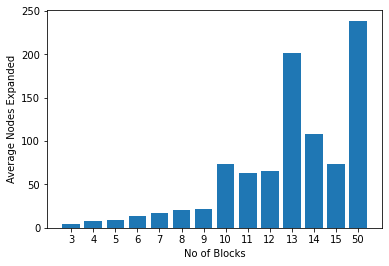

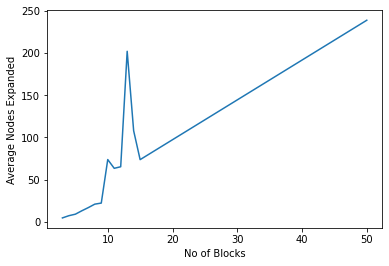

In [ ]:
xAxis = statistics['no_of_blocks']
yAxis = np.array(statistics['nodes_expanded'])

plot(xAxis, yAxis, 'No of Blocks', 'Average Nodes Expanded')
plot_chart(xAxis, np.array(yAxis), 'No of Blocks', 'Average Nodes Expanded')

In [ ]:
###Shall we include only those that are solved?

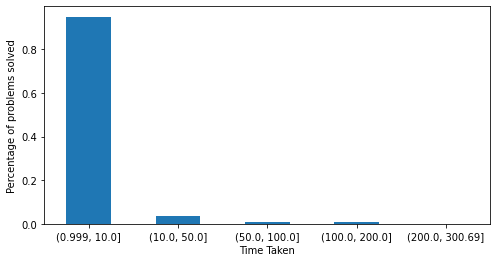

In [ ]:
out = pd.cut(results[results['plan_found'] == True]['time_taken'], bins=[1.0, 10.0, 50.0, 100, 200, max(results['time_taken'])], include_lowest=True)
ax = out.value_counts(sort=False, normalize=True).plot.bar(rot=0, figsize=(8,4))
#ax.set_xticklabels([c[1:-1].replace(","," to") for c in out.cat.categories])
plt.xlabel('Time Taken')
plt.ylabel('Percentage of problems solved')
plt.savefig(f"graphs/Time_Taken.png")
plt.show()


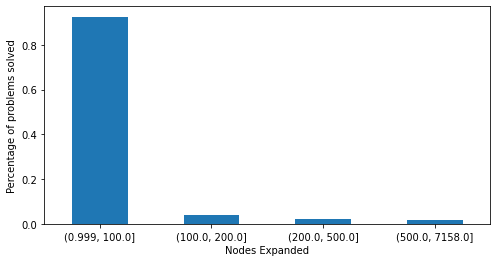

In [ ]:
out = pd.cut(results[results['plan_found'] == True]['nodes_expanded'], bins=[1.0, 100, 200, 500, max(results['nodes_expanded'])], include_lowest=True)
ax = out.value_counts(sort=False, normalize=True).plot.bar(rot=0, figsize=(8,4))
plt.xlabel('Nodes Expanded')
plt.ylabel('Percentage of problems solved')
plt.savefig(f"graphs/Nodes_Expanded.png")
plt.show()

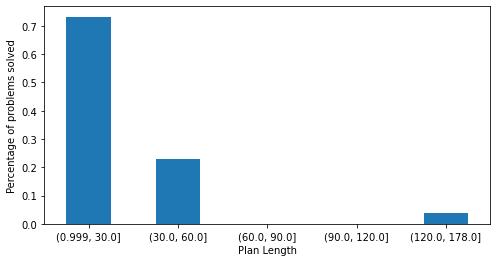

In [ ]:
out = pd.cut(results[results['plan_found'] == True]['plan_length'], bins=[1.0, 30.0, 60.0, 90.0, 120.0, max(results['plan_length'])], include_lowest=True)
ax = out.value_counts(sort=False, normalize=True).plot.bar(rot=0, figsize=(8,4))
plt.xlabel('Plan Length')
plt.ylabel('Percentage of problems solved')
plt.savefig(f"graphs/Plan_Length.png")
plt.show()